In [7]:
import pandas as pd
import seaborn as sns
import missingno as mo
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

In [8]:
df = pd.read_csv(r'C:\Users\jjs61\OneDrive\Desktop\Capstone\Cleaned_query.csv')
df = df.iloc[:, :19]
df.keys()

Index(['date_of_incident', 'Incident_month', 'day_of_week', 'incident_hour',
       'sex_code', 'relationship_name', 'offense_category_name',
       'crime_against', 'county_name', 'lat', 'lon', 'Region', 'Average high',
       'Average low', 'avg_temp_class', 'Days with precipitation ',
       'Av. precipitation in inch ', 'minutes_of_dark', 'day_class'],
      dtype='object')

In [9]:

df.columns = df.columns = df.columns.str.lower().str.replace(' ', '_').str.strip()
df['date_of_incident'] = pd.to_datetime(df['date_of_incident'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17416 entries, 0 to 17415
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   date_of_incident            17416 non-null  datetime64[ns]
 1   incident_month              17416 non-null  object        
 2   day_of_week                 17416 non-null  object        
 3   incident_hour               17411 non-null  float64       
 4   sex_code                    17416 non-null  object        
 5   relationship_name           17416 non-null  object        
 6   offense_category_name       17416 non-null  object        
 7   crime_against               17416 non-null  object        
 8   county_name                 17416 non-null  object        
 9   lat                         17416 non-null  float64       
 10  lon                         17416 non-null  float64       
 11  region                      17357 non-null  object    

In [11]:
df['is_male'] = df['sex_code'].apply(lambda x: 1 if x == 'M' else 0)
df['is_a_couple'] = df['relationship_name'].apply(lambda x: 1 if x == 'couple' else 0)
df['good_weather'] = df['day_class'].apply(lambda x: 1 if x == 'Sunny' else 0)
df


,date_of_incident,incident_month,day_of_week,incident_hour,sex_code,relationship_name,offense_category_name,crime_against,county_name,lat,...,average_high,average_low,avg_temp_class,days_with_precipitation_,av._precipitation_in_inch_,minutes_of_dark,day_class,is_male,is_a_couple,good_weather
0,2021-06-19,Jun,Saturday,11.0,F,ex-couple,Assault,Person,Cuyahoga,41.635059,...,82,61,Warm,10,3.98,539,Sunny,0,0,1
1,2021-06-19,Jun,Saturday,11.0,F,ex-couple,Assault,Person,Cuyahoga,41.635059,...,82,61,Warm,10,3.98,539,Sunny,0,0,1
2,2021-06-03,Jun,Thursday,12.0,F,couple,Assault,Person,Cuyahoga,41.635059,...,82,61,Warm,10,3.98,548,Sunny,0,1,1
3,2021-12-06,Dec,Monday,19.0,M,ex-couple,Sex Offense,Person,Cuyahoga,41.635059,...,41,26,Cold,13,7.40,873,Dark,1,0,0
4,2021-12-29,Dec,Wednesday,8.0,F,ex-couple,Assault,Person,Cuyahoga,41.635059,...,41,26,Cold,13,7.40,878,Dark,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17411,2021-08-09,Aug,Monday,12.0,M,couple,Assault,Person,Lucas,41.684191,...,84,63,Warm,10,3.11,602,Sunny,1,1,1
17412,2021-05-22,May,Saturday,19.0,F,couple,Assault,Person,Lucas,41.684191,...,73,52,Cold,12,3.50,564,Sunny,0,1,1
17413,2021-10-10,Oct,Sunday,15.0,M,couple,Homicide,Person,Stark,40.813888,...,65,44,Cold,9,1.65,758,Dark,1,1,0
17414,2021-10-06,Oct,Wednesday,3.0,M,couple,Assault,Person,Cuyahoga,41.635059,...,65,44,Cold,9,1.65,748,Dark,1,1,0


<Axes: >

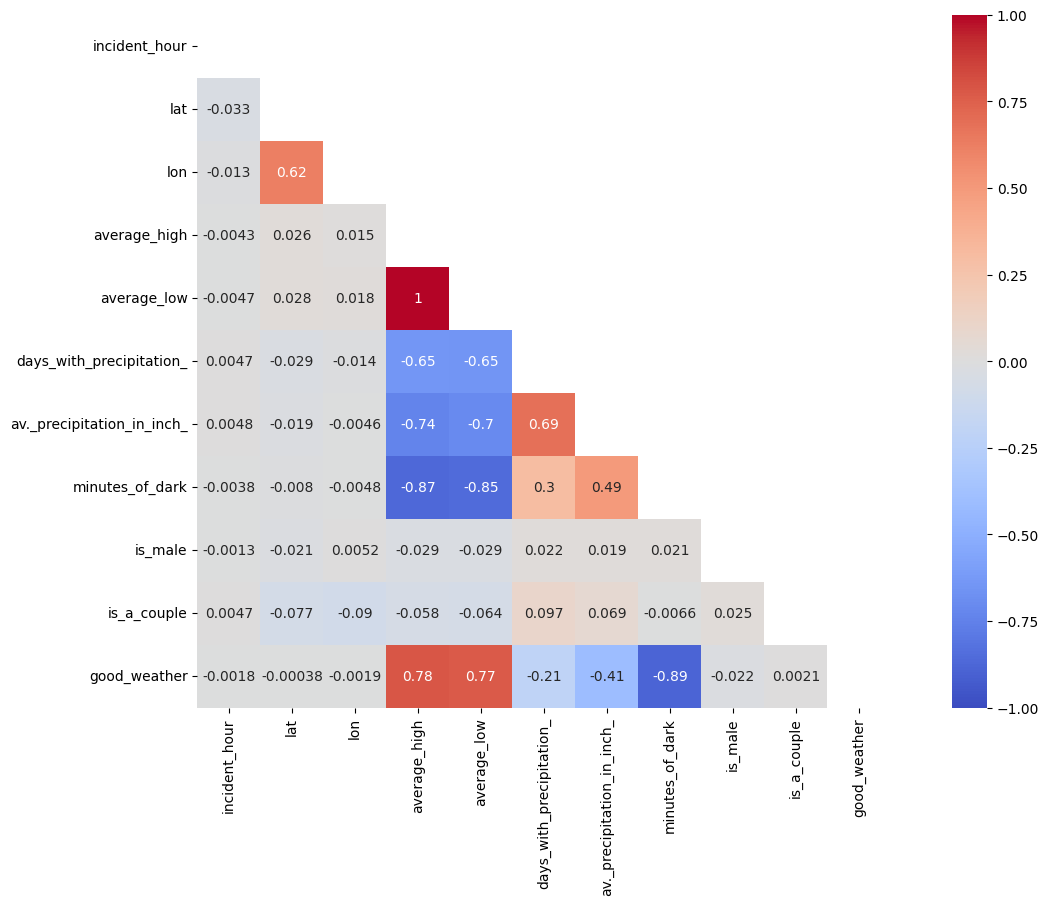

In [12]:
# This code is taken with minor modifications from https://seaborn.pydata.org/generated/seaborn.heatmap.html

# Establish size of figure.
plt.figure(figsize=(16,9))
# Get correlation of variables.
sns.heatmap
# Set up mask to be "True" in the upper triangle. !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
core = df.corr(numeric_only=True)
mask = np.zeros_like(core)
mask[np.triu_indices_from(mask)] = True

# Plot our correlation heatmap

sns.heatmap(core,
            square = True,
            cmap="coolwarm",
            annot=True,
            vmax= 1,
            vmin=-1,
         mask=mask)

<Axes: xlabel='good_weather', ylabel='count'>

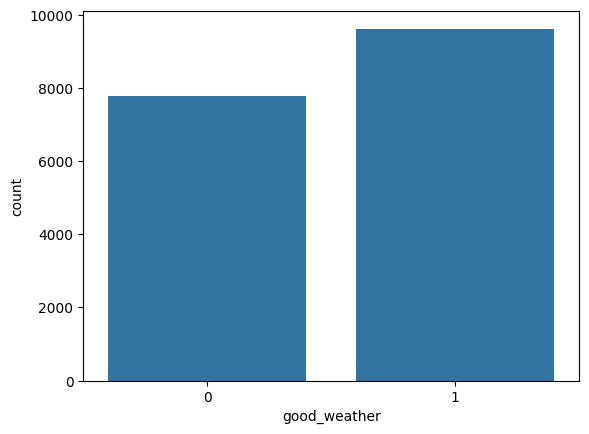

In [13]:
sns.countplot(df, x='good_weather')


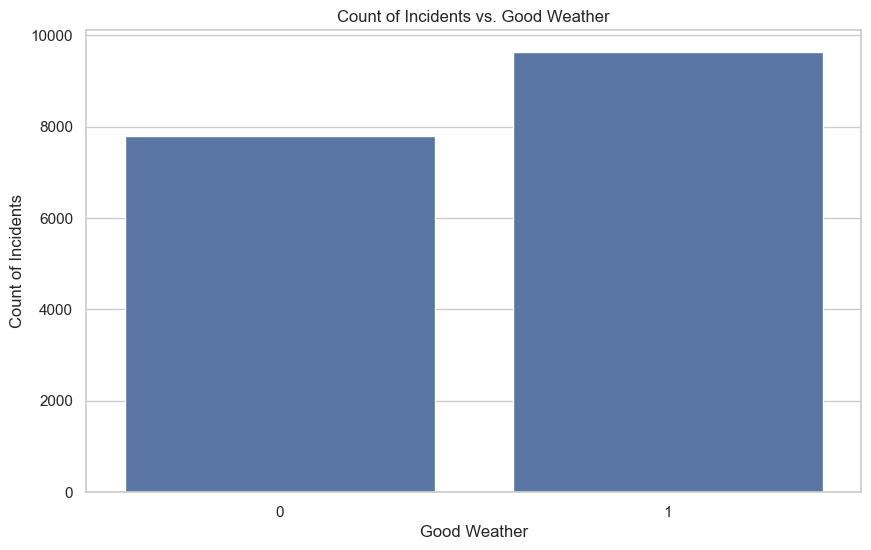

In [14]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Use countplot to count the number of incidents for each date
sns.countplot(data=df, x='good_weather')


plt.xlabel('Good Weather')
plt.ylabel('Count of Incidents')
plt.title('Count of Incidents vs. Good Weather')

plt.show()

<Axes: xlabel='is_male', ylabel='count'>

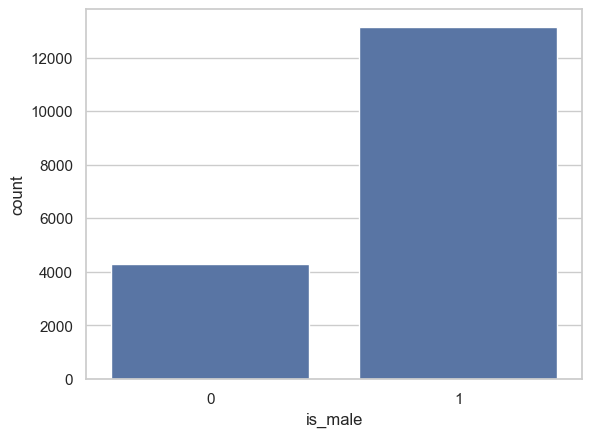

In [15]:
sns.countplot(data=df, x='is_male')

In [16]:
px.histogram(df,x='date_of_incident')


c:\Users\jjs61\AppData\Local\Programs\Python\Python39\lib\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


In [17]:
fig = px.bar(df,x='good_weather', y='is_male',color="relationship_name",color_discrete_sequence=['black', 'red'],text='offense_category_name')
fig.update_layout(
    plot_bgcolor='white'  # Set the background color to 'lightgray'
)
fig.show()

In [22]:
df.to_csv('sample_data.csv', index=False)     



In [19]:
df.head()

,date_of_incident,incident_month,day_of_week,incident_hour,sex_code,relationship_name,offense_category_name,crime_against,county_name,lat,...,average_high,average_low,avg_temp_class,days_with_precipitation_,av._precipitation_in_inch_,minutes_of_dark,day_class,is_male,is_a_couple,good_weather
0,2021-06-19,Jun,Saturday,11.0,F,ex-couple,Assault,Person,Cuyahoga,41.635059,...,82,61,Warm,10,3.98,539,Sunny,0,0,1
1,2021-06-19,Jun,Saturday,11.0,F,ex-couple,Assault,Person,Cuyahoga,41.635059,...,82,61,Warm,10,3.98,539,Sunny,0,0,1
2,2021-06-03,Jun,Thursday,12.0,F,couple,Assault,Person,Cuyahoga,41.635059,...,82,61,Warm,10,3.98,548,Sunny,0,1,1
3,2021-12-06,Dec,Monday,19.0,M,ex-couple,Sex Offense,Person,Cuyahoga,41.635059,...,41,26,Cold,13,7.40,873,Dark,1,0,0
4,2021-12-29,Dec,Wednesday,8.0,F,ex-couple,Assault,Person,Cuyahoga,41.635059,...,41,26,Cold,13,7.40,878,Dark,0,0,0


In [23]:
import statsmodels.api as sm


In [24]:
df = pd.read_csv(r"C:\Users\jjs61\OneDrive\Desktop\Capstone\test_r_data2.csv")

In [25]:
df

,date_of_incident,incident_hour,lat,lon,average_high,average_low,minutes_of_dark,temp_class,is_male,is_a_couple,day_class
0,6/19/2021,11.0,41.635059,-81.700196,82,61,539,1,0,0,1
1,6/19/2021,11.0,41.635059,-81.700196,82,61,539,1,0,0,1
2,6/3/2021,12.0,41.635059,-81.700196,82,61,548,1,0,1,1
3,12/6/2021,19.0,41.635059,-81.700196,41,26,873,0,1,0,0
4,12/29/2021,8.0,41.635059,-81.700196,41,26,878,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
17411,8/9/2021,12.0,41.684191,-83.468275,84,63,602,1,1,1,1
17412,5/22/2021,19.0,41.684191,-83.468275,73,52,564,0,0,1,1
17413,10/10/2021,15.0,40.813888,-81.365637,65,44,758,0,1,1,0
17414,10/6/2021,3.0,41.635059,-81.700196,65,44,748,0,1,1,0


In [56]:

df['date_of_incident'] = pd.to_datetime(df['date_of_incident'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17416 entries, 0 to 17415
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date_of_incident  17416 non-null  datetime64[ns]
 1   incident_hour     17411 non-null  float64       
 2   lat               17416 non-null  float64       
 3   lon               17416 non-null  float64       
 4   average_high      17416 non-null  int64         
 5   average_low       17416 non-null  int64         
 6   minutes_of_dark   17416 non-null  int64         
 7   temp_class        17416 non-null  int64         
 8   is_male           17416 non-null  int64         
 9   is_a_couple       17416 non-null  int64         
 10  day_class         17416 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(7)
memory usage: 1.5 MB


In [52]:
from category_encoders import OneHotEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,roc_auc_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier, XGBRFRegressor
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [57]:
# 1. Data Preparation
# Split your data into features (X) and the target variable (y)
X = df.drop(columns=['is_male'])
y = df['is_male']

# 2. Feature Engineering (if needed)

# 3. Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Model Selection
model = LogisticRegression()

# 5. Model Training
model.fit(X_train, y_train)

# 6. Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)



DTypePromotionError: The DType <class 'numpy.dtypes.DateTime64DType'> could not be promoted by <class 'numpy.dtypes.Float64DType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.DateTime64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>)

In [47]:
baseline = [df.day_class.mean()]*len(df)
baseline

[0.5528824069820855,
 0.5528824069820855,
 0.5528824069820855,
 0.5528824069820855,
 0.5528824069820855,
 0.5528824069820855,
 0.5528824069820855,
 0.5528824069820855,
 0.5528824069820855,
 0.5528824069820855,
 0.5528824069820855,
 0.5528824069820855,
 0.5528824069820855,
 0.5528824069820855,
 0.5528824069820855,
 0.5528824069820855,
 0.5528824069820855,
 0.5528824069820855,
 0.5528824069820855,
 0.5528824069820855,
 0.5528824069820855,
 0.5528824069820855,
 0.5528824069820855,
 0.5528824069820855,
 0.5528824069820855,
 0.5528824069820855,
 0.5528824069820855,
 0.5528824069820855,
 0.5528824069820855,
 0.5528824069820855,
 0.5528824069820855,
 0.5528824069820855,
 0.5528824069820855,
 0.5528824069820855,
 0.5528824069820855,
 0.5528824069820855,
 0.5528824069820855,
 0.5528824069820855,
 0.5528824069820855,
 0.5528824069820855,
 0.5528824069820855,
 0.5528824069820855,
 0.5528824069820855,
 0.5528824069820855,
 0.5528824069820855,
 0.5528824069820855,
 0.5528824069820855,
 0.5528824069

In [50]:
# Step 1a: Create the pipeline object
model_lr = make_pipeline(
    # Step 1b: Add in any preprocessors to the pipeline
    OneHotEncoder(use_cat_names=True),
    # Step 1c: Add in the model object to the pipeline
    LinearRegression()
)

# Step 2: Fit the pipeline
model_lr.fit(x_train, y_train)

c:\Users\jjs61\AppData\Local\Programs\Python\Python39\lib\site-packages\category_encoders\utils.py:50: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\jjs61\AppData\Local\Programs\Python\Python39\lib\site-packages\category_encoders\utils.py:28: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



DTypePromotionError: The DType <class 'numpy.dtypes.DateTime64DType'> could not be promoted by <class 'numpy.dtypes.Float64DType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.DateTime64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>)

In [51]:
# Step 1a: Create the pipeline object
pipe_dt = make_pipeline(
    # Step 1b: Add in any preprocessors to the pipeline
    OneHotEncoder(use_cat_names=True),
    # Step 1c: Add in the model object to the pipeline
    DecisionTreeRegressor(random_state=42)
)

# Step 2: Fit the pipeline
pipe_dt.fit(x_train, y_train)

c:\Users\jjs61\AppData\Local\Programs\Python\Python39\lib\site-packages\category_encoders\utils.py:50: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\jjs61\AppData\Local\Programs\Python\Python39\lib\site-packages\category_encoders\utils.py:28: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



DTypePromotionError: The DType <class 'numpy.dtypes.DateTime64DType'> could not be promoted by <class 'numpy.dtypes.Float64DType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.DateTime64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>)